In [1]:
from graphdriver.commons import results, setup
from graphdriver.utils import paths
import pandas as pd
from collections import defaultdict

/home/joe/miniconda3/envs/graph/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dfs = []
for nt in list(reversed(setup.network_types()))[1:]:
    scores_dict = defaultdict()
    for cancer in setup.cancer_types():
        score, _ = results.load_results(cancer, nt).score_test_pr_auc()
        if '_'.join(nt) == 'genes_ppi':
            net_name = 'MGNNdriver'
        elif '_'.join(nt) == 'genes':
            net_name = 'a)'
        elif '_'.join(nt) == 'ppi':
            net_name = 'b)'
        scores_dict[cancer] = {net_name: score}
        df = pd.DataFrame(scores_dict).T
        # df = ranking_standardize_df(df, '_'.join(nt))
    dfs.append(df)

df = pd.concat(dfs, axis=1)
df['a) $+$ b)'] = df.iloc[:,1:].sum(axis=1)

In [3]:
path = 'results_main_corr.tex'
# df.corr().round(3).to_latex(path, escape=False)
df

,MGNNdriver,a),b),a) $+$ b)
blca,0.603776,0.355003,0.510898,0.865901
brca,0.578261,0.167803,0.506182,0.673984
cesc,0.627023,0.321643,0.531812,0.853455
coad,0.495652,0.211272,0.407828,0.619100
esca,0.354783,0.121739,0.401326,0.523065
hnsc,0.496405,0.180479,0.441310,0.621789
lihc,0.578736,0.206219,0.568689,0.774909
luad,0.430117,0.294076,0.349638,0.643714
lusc,0.443113,0.131740,0.337902,0.469642
prad,0.348323,0.111462,0.375919,0.487382


In [4]:
df.corr().round(3)

,MGNNdriver,a),b),a) $+$ b)
MGNNdriver,1.000,0.708,0.819,0.884
a),0.708,1.000,0.497,0.857
b),0.819,0.497,1.000,0.873
a) $+$ b),0.884,0.857,0.873,1.000


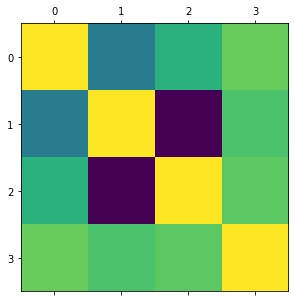

In [6]:
import matplotlib.pyplot as plt
plt.matshow(df.corr().round(3))


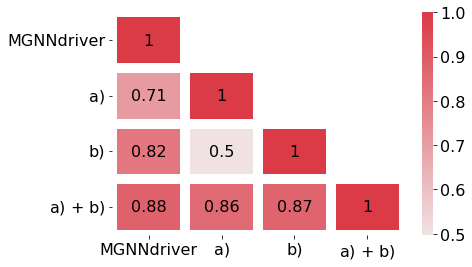

In [7]:
import seaborn as sns
import numpy as np
plt.rc('font', size=16) 

corr  = df.corr()
f, ax = plt.subplots(figsize=(7, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(120, 10, n=1000, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))
mask =np.invert(mask).T

# Draw the heatmap with the mask and correct aspect ratio
fig = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.45,
            square=False, linewidths=10, annot=True, annot_kws={'color':'black'})
plt.tight_layout()
plt.savefig("./results-main-corr.png") 
plt.show()
plt.close()


,MGNNdriver,a),b),a) $+$ b)
MGNNdriver,1.000000,0.707849,0.819090,0.884020
a),0.707849,1.000000,0.497458,0.856992
b),0.819090,0.497458,1.000000,0.873360
a) $+$ b),0.884020,0.856992,0.873360,1.000000


In [19]:
corr

,MGNNdriver,a),b),a) $+$ b)
MGNNdriver,1.000000,0.707849,0.819090,0.884020
a),0.707849,1.000000,0.497458,0.856992
b),0.819090,0.497458,1.000000,0.873360
a) $+$ b),0.884020,0.856992,0.873360,1.000000
